In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [24]:
!wget -O /content/data.csv

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [34]:
df = pd.read_csv("/content/data.csv")

# take a look at the dataset
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [35]:
# summarize the data
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [31]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     4600 non-null   float64
 1   bedrooms  4600 non-null   float64
dtypes: float64(2)
memory usage: 72.0 KB


In [30]:
house.shape

(4600, 2)

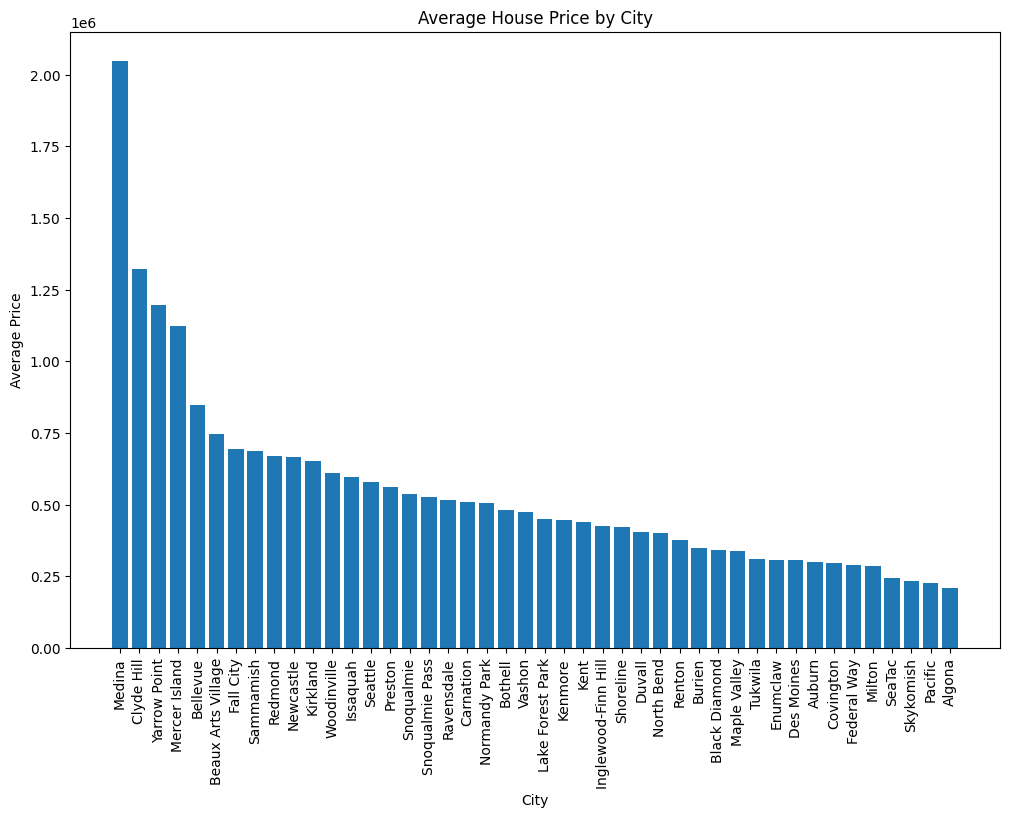

In [45]:
# @title Average House Price by City

import matplotlib.pyplot as plt

avg_prices = df.groupby('city')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(avg_prices.index, avg_prices.values)
plt.xlabel('City')
plt.ylabel('Average Price')
plt.title('Average House Price by City')
_ = plt.xticks(rotation=90)

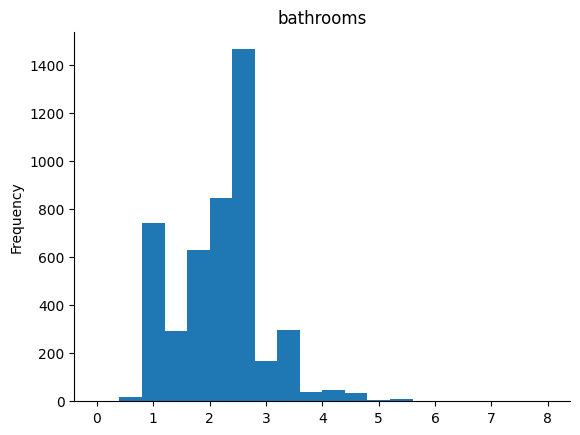

In [43]:
# @title bathrooms

from matplotlib import pyplot as plt
df['bathrooms'].plot(kind='hist', bins=20, title='bathrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [29]:
house.isnull().sum()*100/house.shape[0]

price       0.0
bedrooms    0.0
dtype: float64

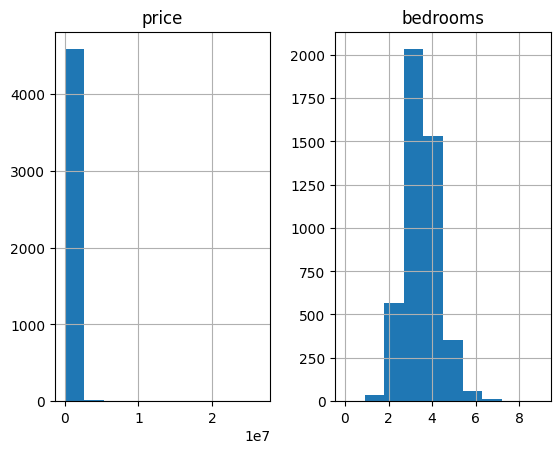

In [37]:
viz = house[['price','bedrooms']]
viz.hist()
plt.show()

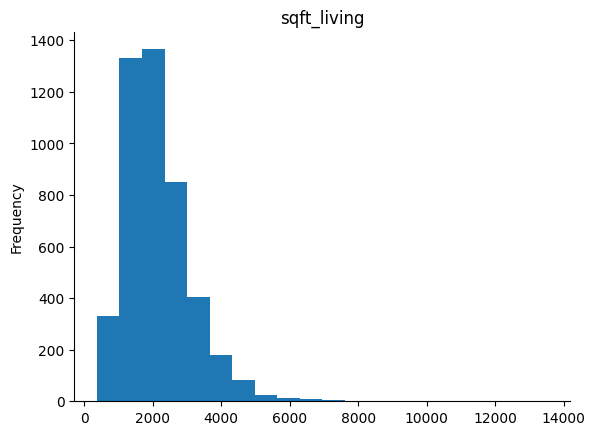

In [44]:
# @title sqft_living

from matplotlib import pyplot as plt
df['sqft_living'].plot(kind='hist', bins=20, title='sqft_living')
plt.gca().spines[['top', 'right',]].set_visible(False)

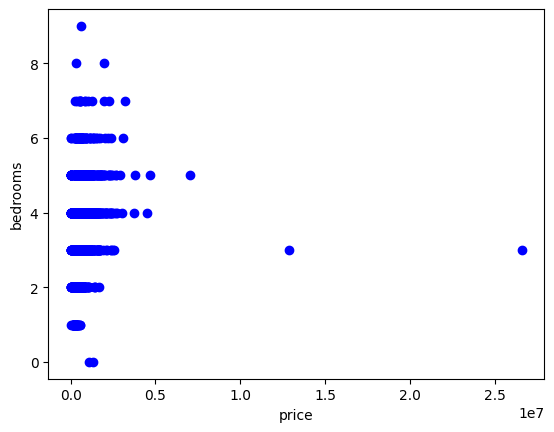

In [14]:
plt.scatter(house.price, house.bedrooms,  color='blue')
plt.xlabel("price")
plt.ylabel("bedrooms")
plt.show()

In [15]:
msk = np.random.rand(len(df)) < 0.8
train = house[msk]
test = house[~msk]

In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['price']])
train_y = np.asanyarray(train[['bedrooms']])
regr.fit(train_x, train_y)
# The coefficients
print ('price: ', regr.coef_)
print ('bedrooms: ',regr.intercept_)

price:  [[2.756067e-07]]
bedrooms:  [3.25572707]


Text(0, 0.5, 'bedrooms')

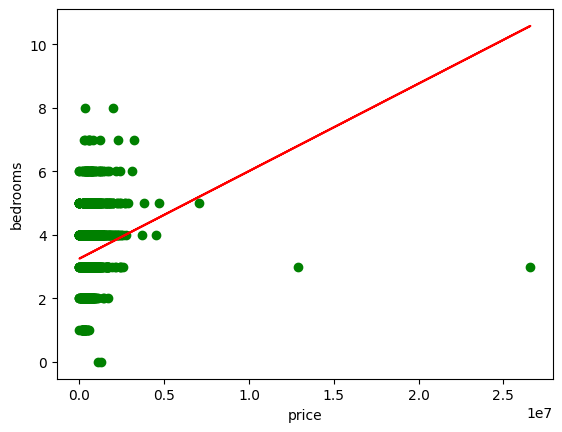

In [38]:
plt.scatter(train.price, train.bedrooms,  color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("price")
plt.ylabel("bedrooms")

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['price']])
train_y = np.asanyarray(train[['bedrooms']])

test_x = np.asanyarray(test[['price']])
test_y = np.asanyarray(test[['bedrooms']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.00000000e+00, 3.13000000e+05, 9.79690000e+10],
       [1.00000000e+00, 3.42000000e+05, 1.16964000e+11],
       [1.00000000e+00, 5.50000000e+05, 3.02500000e+11],
       ...,
       [1.00000000e+00, 4.16904167e+05, 1.73809084e+11],
       [1.00000000e+00, 2.03400000e+05, 4.13715600e+10],
       [1.00000000e+00, 2.20600000e+05, 4.86643600e+10]])

In [40]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['price']])
y = np.asanyarray(train[['bedrooms']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[2.756067e-07]]
